#### Задание 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [2]:
x_train_scaled = pd.read_pickle('data/x_train_scaled.pkl')
x_train_tsne = pd.read_pickle('data/x_train_tsne.pkl')

In [3]:
from sklearn.cluster import KMeans

In [4]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [5]:
labels_train = kmeans.fit_predict(x_train_scaled)

In [6]:
labels_train.shape

(379,)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

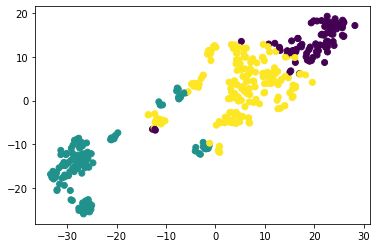

In [7]:
plt.scatter(x_train_tsne['x'], x_train_tsne['y'], c = labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [8]:
x_train = pd.read_pickle('data/x_train.pkl')
y_train = pd.read_pickle('data/y_train.pkl')

In [9]:
pd.value_counts(labels_train)

2    177
1    122
0     80
dtype: int64

In [10]:
for i in list(pd.value_counts(labels_train).index):
    price = np.round(y_train.loc[labels_train == i, ['Price']].mean()[0], 3)
    crim = np.round(x_train.loc[labels_train == i, ['CRIM']].mean()[0], 3)
    print(f'Cluster #{i}:\tmean_price = {price},\tmean_CRIM = {crim}.')

Cluster #2:	mean_price = 25.107,	mean_CRIM = 0.431.
Cluster #1:	mean_price = 16.302,	mean_CRIM = 10.102.
Cluster #0:	mean_price = 28.115,	mean_CRIM = 0.074.


Сохранение результатов для использования в следующих заданиях

In [11]:
import pickle

In [12]:
with open('models/kmeans.pkl', 'wb') as file_kmeans:
    pickle.dump(obj = kmeans, file = file_kmeans)